## Описание проекта. Загрузка данных, изучение общей информации.

### Введение
______
**Название проекта**  

Планирование продаж на следующий год интернет-магазина «Стримчик» по продажам компьютерных игр.
_____

**Цель исследования**  

Определение потенциально популярных продуктов для планирования продаж и рекламной кампании на следующий год по регионам интернет-магазина по продажам компьютерных игр.
_______
**Задачи исследования**

- Провести анализ данных в разрезе выпуска игр по годам и продаж игр по платформам
- Определить актуальный период исторических данных, на основе которого будет строится прогноз на следующий год
- Отобрать потенциально прибыльные платформы (здесь и далее и использовать актуальный период данных)
- Рассмотреть влияние на продажи отзывов пользователей и критиков
- Определить наиболее прибыльные жанры игр
- Составить портрет пользователя для каждого региона на основе анализа по региону:
    - популярности платформ
    - популярности жанров
    - рейтинга ESRB
- Проверить необходимые гипотезы:
    - о равентстве средних пользовательских рейтингов платформ Xbox One и PC 
    - о разнице средних пользовательских рейтингов жанров Action и Sports 
- Сделать необходимые выводы по результам исследования
_____
**Исходные данные**  

Имеются данные до 2016 года, представлены в виде одного датасета и содержат следующую информацию:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).

### Загрузка данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import os

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6, 4)
pd.set_option('display.max_columns', None)

In [3]:
pth1 = '/datasets/games.csv'
pth2 = 'https://code.s3.yandex.net/datasets/games.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something with loading data is wrong')

##### Общая информация о датасете

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Зафиксируем начальное количество данных в переменную `shape_df_start`

In [8]:
shape_df_start = df.shape
shape_df_start

(16715, 11)

Загружена и получена общая информация по датасету, зафиксирован первоначальный объем датасета. В данных имеются пропуски, некорректные типы, заглавные буквы в наименованиях столбцов. Проработка указанных моментов, а также выявление аномальных значений будут произведены на следующих этапах обработки данных.

## Предобработка и подготовка данных

Приведем названия столбцов к нижнему регистру

In [9]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка дубликатов

Проверим на наличие явных строк-дубликатов в данных

In [10]:
df.duplicated().sum()

0

In [11]:
df.duplicated(subset=['name', 'platform']).sum()

5

In [12]:
df[df.duplicated(subset=['name', 'platform'], keep=False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


### Обработка пропусков в данных

In [13]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В столбце `user_score` присутствует большое количество значений `tbd`, что означает, что рейтинг пользователями еще не присвоен, другими словами отсутствует. В связи с этим, для присвоения корректного типа данных `float`, а также для возможности его обработки математическими методами, заменим `tbd` на пропуски.

In [14]:
df['user_score'].value_counts(dropna=False).head(3)

NaN    6701
tbd    2424
7.8     324
Name: user_score, dtype: int64

In [15]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN) 

В столбце `rating` присутствует устаревший рейтинг `"K-A"` ("Kids to Adults"), в н/в время используется `"E"` https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board. Произведем необходимую замену.

In [16]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
df['rating'] = df['rating'].replace('K-A', 'E') 
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Также в столбце `rating` присутствуют пропуски, для которых нет адекватной замены, поэтому заменим их на значение `unk` (unknown).

In [18]:
df['rating'] = df['rating'].fillna('unk')

In [19]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64

По оставшимся пропущенным параметрам: `critic_score`,  `user_score` логичную замену предположить невозможно, поэтому оставляем здесь пропуски. Возможные причины: человеческий фактор, либо игра на момент формирования данных еще не была оценена критиками или пользователями либо техническая ошибка с выгрузкой данных.

### Изменение типов данных

В целях экономии памяти и в отсутствии необходимости в расчетах значительной точности переведем в 32-битный разряд данные из датасета. Данные из `year_of_release` приведем к целочисленному типу

In [20]:
df = df.astype({'na_sales': 'float32', 'eu_sales': 'float32',\
                'jp_sales': 'float32', 'other_sales': 'float32',\
                'year_of_release': 'Int64', 'user_score': 'float32'})

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float32
 5   eu_sales         16715 non-null  float32
 6   jp_sales         16715 non-null  float32
 7   other_sales      16715 non-null  float32
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float32
 10  rating           16715 non-null  object 
dtypes: Int64(1), float32(5), float64(1), object(4)
memory usage: 1.1+ MB


In [22]:
df = df.reset_index(drop=True)

### Удаление данных пропусков с сохранением оригинального датасета после обработки

Cохраним оригинальный датасет после обработки

In [23]:
df_original = df

In [24]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,unk
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,unk


In [25]:
df.shape

(16715, 11)

In [26]:
df.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)

In [27]:
df.shape

(16444, 11)

In [28]:
shape_df = df.shape
print(f'Доля текущего объема данных относительно первоначального составляет: {shape_df[0]/shape_df_start[0]:.1%}')

Доля текущего объема данных относительно первоначального составляет: 98.4%


### Расчет суммарных продаж во всех регионах

In [29]:
df['all_sales'] =  df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [30]:
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,unk,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000


**Вывод:** на этапе предобработки данных были обработаны пропуски, там где нельзя было подобрать логическую замену и количество пропусков было мало - данные были удалены, в остальных случаях сохранены. Устаревшие значения в столбце `rating` были заменены на актуальные. Названия столбцов были приведены к нижнему регистру. Типы данных в столбцах изменены на корректные. По итогам анализа данные сохранены в объеме 98.4%.

## Исследовательский анализ данных


### Рассмотрение количества выпуска игр по годам

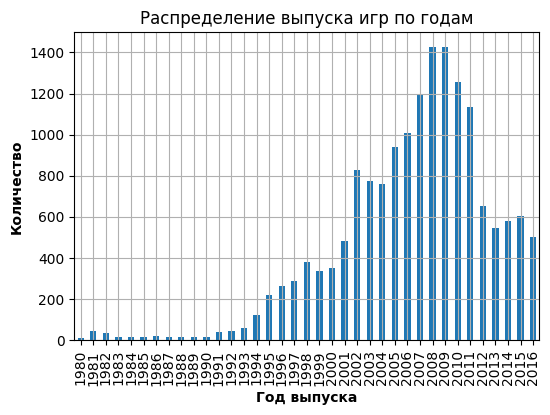

In [31]:
df['year_of_release'].value_counts().sort_index(ascending=True)\
                     .plot.bar(grid=True)
plt.title("Распределение выпуска игр по годам")
plt.xlabel("Год выпуска", fontweight="bold")
plt.ylabel("Количество", fontweight="bold")
plt.show()

Посмотрим, наличие игр, которые выходил в один год на разных платформах, посчитаем количество таких "дублей"

In [32]:
display(df[df.duplicated(subset=['name', 'year_of_release'], keep=False)]\
        .sort_values(by='name').head())
df.duplicated(subset=['name', 'year_of_release']).sum()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
3358,Frozen: Olaf's Quest,3DS,2013,Platform,0.27,0.27,0.00,0.05,NaN,NaN,unk,0.59
3862,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,NaN,NaN,unk,0.51
3120,007: Quantum of Solace,Wii,2008,Action,0.29,0.28,0.01,0.07,54.0,7.5,T,0.65
1785,007: Quantum of Solace,PS3,2008,Action,0.43,0.51,0.02,0.19,65.0,6.6,T,1.15
4475,007: Quantum of Solace,PS2,2008,Action,0.17,0.00,0.00,0.26,NaN,NaN,unk,0.43


4249

Исключим такие "дубли" из распределения, чтобы оценить именно "истинное" количество игр, выпущенных в конкретный год

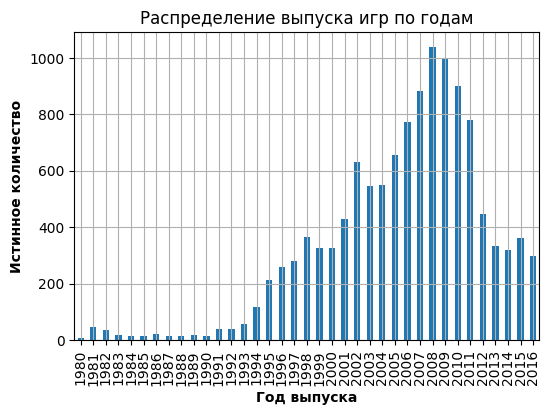

In [33]:
df_game = df.drop_duplicates(subset=['name', 'year_of_release'], keep='first')

df_game['year_of_release'].value_counts().sort_index(ascending=True)\
                          .plot.bar(grid=True)
plt.title("Распределение выпуска игр по годам")
plt.xlabel("Год выпуска", fontweight="bold")
plt.ylabel("Истинное количество", fontweight="bold")
plt.show()

Из графика распределения видно, что значительный рост выпуска игр начался с 1994 года, что объяснется тем, что начало 1990-х было ознаменовано заметными инновациями в компьютерных играх. Основными достижениями называют переход от растровой графики к полностью полигональному 3D, снижение популярности аркадных игр и появление нескольких новых жанров - шутер от первого лица, стратегия в реальном времени. Больше всего игр выпускалось в период с 2006 по 2011 гг, что связано с тем, компьютерные технологии и в "железе" и в ПО к этому моменту совершили качественный скачок в развитиии, такие консоли, как Xbox 360, PlayStation 3 и Nintendo Wii, предложили игрокам совершенно новый уровень графики, геймдизайн открывал новые возможности, наблюдался взрывной рост многопользовательских онлайн ролевых игр по всему миру.

### Рассмотрение изменения продаж по платформам

Определим платформы с наибольшими общими продажами

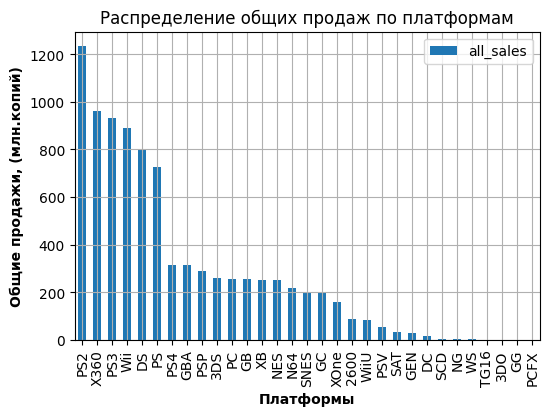

In [34]:
df.pivot_table(index='platform', values='all_sales', aggfunc='sum')\
            .sort_values(by='all_sales', ascending=False).plot.bar(grid=True)
plt.title("Распределение общих продаж по платформам")
plt.xlabel("Платформы", fontweight="bold")
plt.ylabel("Общие продажи, (млн.копий)", fontweight="bold")
plt.show()

Из графика видно, что наиболее крупными по общим продажам являются первые шесть платформ: `PS2, X360, PS3, Wii, DS, PS`.  Построим для них график распределения продаж по годам.

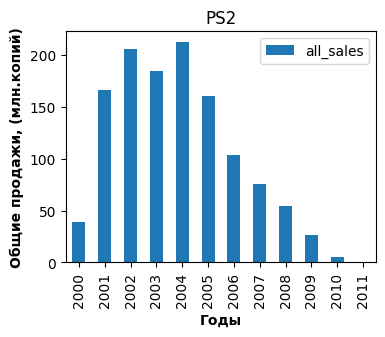

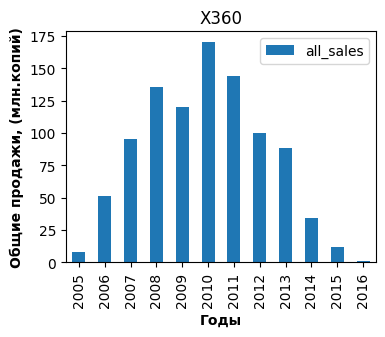

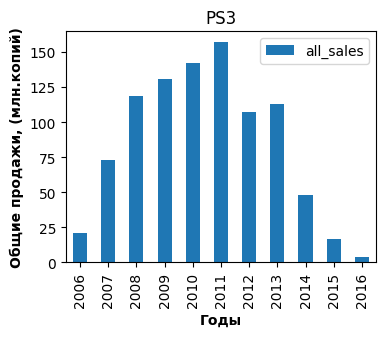

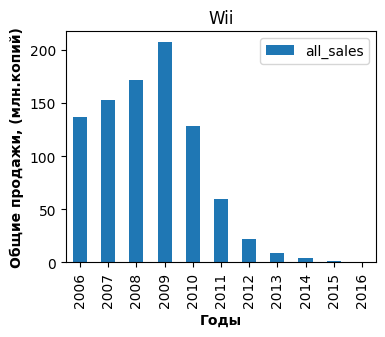

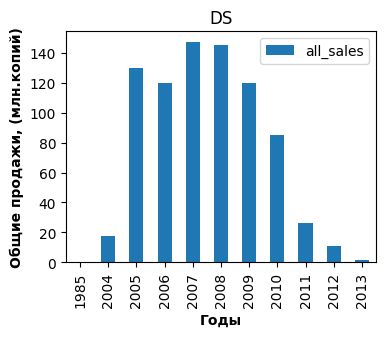

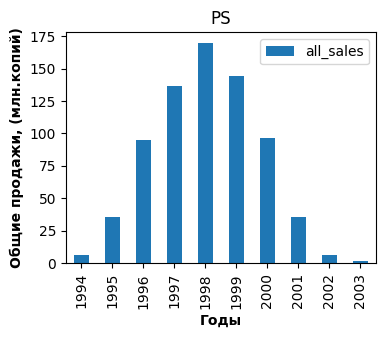

In [35]:
# создадим список из первых шести крупных платформ
big_platform = df.pivot_table(index='platform', values='all_sales', aggfunc='sum')\
                 .sort_values(by='all_sales', ascending=False)\
                 .index[:6].tolist()

for i in big_platform:
    df.loc[df['platform'] == i].pivot_table(index=['platform', 'year_of_release'],\
                                            values='all_sales', aggfunc='sum')\
                                    .reset_index()\
                                    .plot.bar(x='year_of_release', y='all_sales', figsize=(4, 3), title=i)
    plt.xlabel("Годы", fontweight="bold")
    plt.ylabel("Общие продажи, (млн.копий)", fontweight="bold")
    plt.show()

*На графиках продаж платформы DS видно редкое значение продаж за 1985г., это некорректность в данных, т.к консоль DS (Nintendo DS) была выпущена в 2004, а в 1985 была просто консоль Nintendo, к которой видимо и относятся данные. При анализе цикла жизни платформы это аномальное значение не принималось к рассмотрению.*

In [36]:
df.query('platform == "DS"').sort_values(by='year_of_release').head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.0,0.02,0.0,NaN,NaN,unk,0.02
13463,Cocoto Kart Racer,DS,2004,Racing,0.04,0.0,0.00,0.0,NaN,NaN,E,0.04
11517,Kenshuui Tendo Dokuta,DS,2004,Simulation,0.00,0.0,0.08,0.0,NaN,NaN,unk,0.08


Дополнительно посмотрим, как часто появляются новые платформы или новые версии старых

In [37]:
df.groupby('platform').agg({'year_of_release':'first'})\
    .sort_values(by='year_of_release')\
    .reset_index()

,platform,year_of_release
0,2600,1982
1,NES,1985
2,SNES,1990
3,GEN,1992
4,GG,1992
5,SCD,1993
6,NG,1994
7,3DO,1995
8,TG16,1995
9,SAT,1995


Из таблицы видно, новые платформы или новые версии старых платформ появляются каждые 1-2 года, а в 2015 обновление произошло сразу у 2-ух платформ. При этом из графиков распределения продаж по годам 6 крупнейших по продажам платформ видно, что довольно четко выделяется 10 летний цикл жизни игровой платформы от момента старта продаж выпускаемых игр до момента, когда продажи практически прекращаются. Это обусловлено постоянной модернизацией платформ, выпуском их новых версий и завершением разработчиками поддержки старых платформ. 

### Выбор актуального периода для прогноза кампании на 2017 год

В связи с тем, что период "роста" в жизненном цикле платформы составляет в среднем первые 5 лет, посмотрим динамику общих продаж по каждой платформе за этот период

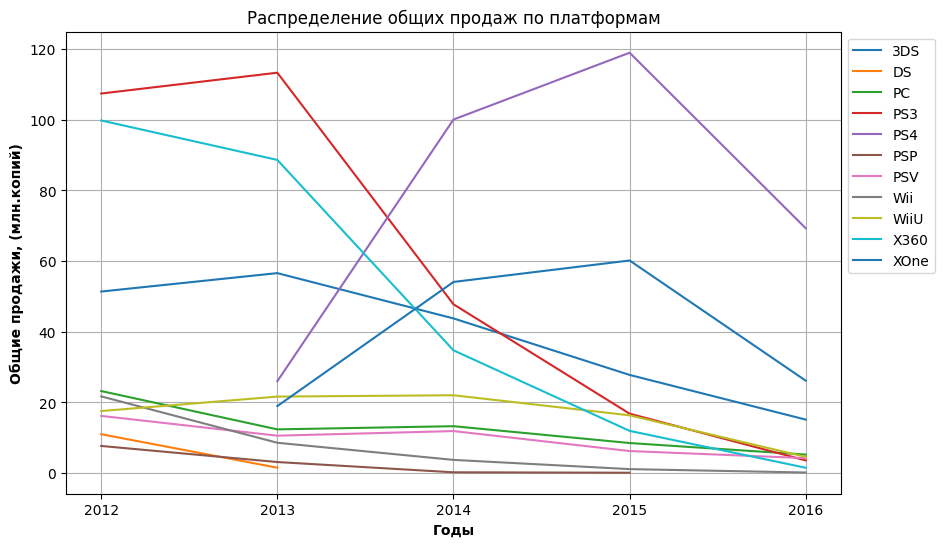

In [76]:
df.query("2012 <= year_of_release <= 2016")\
    .pivot_table(index='year_of_release',columns = 'platform',\
                 values='all_sales', aggfunc='sum')\
    .plot(grid=True, figsize=(10, 6))
plt.title("Распределение общих продаж по платформам")
plt.xlabel("Годы", fontweight="bold")
plt.ylabel("Общие продажи, (млн.копий)", fontweight="bold")
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(np.arange(2012, 2017, 1))
plt.show()

Из графиков видно, что на подавляющем большинстве платформ наблюдается спад продаж, выделяются только 2 платформы с ростом до 2015 г., это `PS4 и XOne`.
Единая тенденция в продажах наблюдается за последние два года, для полноты картины выберем в качестве актуального период `с 2014 по 2016` гг

## Отбор потенциально прибыльных платформ

Распределение общих продаж по платформам за период `2014 - 2016` гг

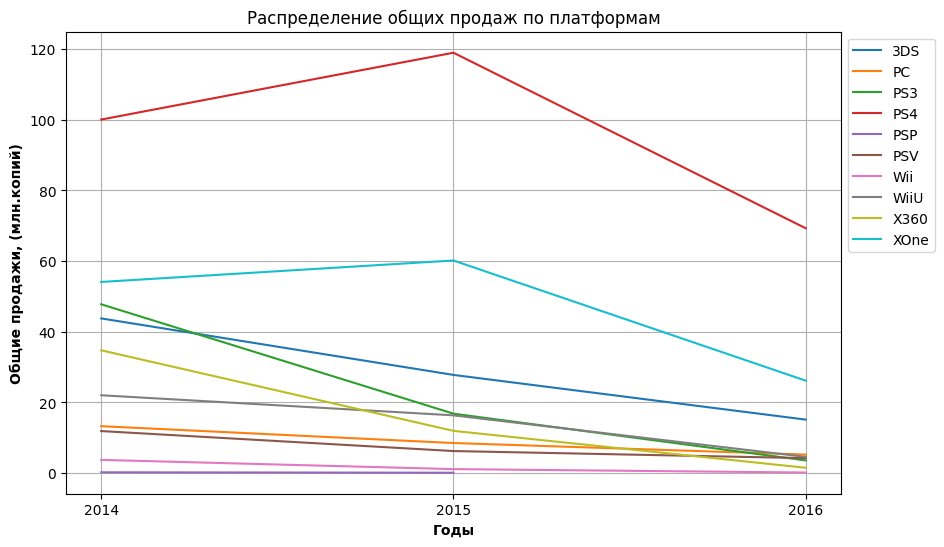

In [39]:
# Выделим из общего датасета данные, относящиеся к актуальному периоду
df_act = df.query("2014 <= year_of_release <= 2016").reset_index(drop=True)

df_act.pivot_table(index='year_of_release',columns = 'platform',\
                   values='all_sales', aggfunc='sum')\
      .plot(grid=True, figsize=(10, 6))
plt.title("Распределение общих продаж по платформам")
plt.xlabel("Годы", fontweight="bold")
plt.ylabel("Общие продажи, (млн.копий)", fontweight="bold")
plt.xticks(np.arange(2014, 2017, 1.0))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [40]:
df_act.pivot_table(index='year_of_release',columns = 'platform',\
                   values='all_sales', aggfunc='sum')

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.759998,13.280001,47.759998,100.000000,0.24,11.90,3.75,22.030001,34.740002,54.070000
2015,27.780001,8.520000,16.820000,118.900002,0.12,6.25,1.14,16.350000,11.960000,60.139999
2016,15.140000,5.250000,3.600000,69.250000,NaN,4.25,0.18,4.600000,1.520000,26.150000


Общие продажи за последние 3 года

In [41]:
df_act.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales',\
                              'other_sales', 'all_sales']]\
      .sum()\
      .sort_values(by='all_sales', ascending=False)\
      .reset_index()

,platform,na_sales,eu_sales,jp_sales,other_sales,all_sales
0,PS4,98.610001,130.039993,15.020000,44.48,288.149994
1,XOne,81.269997,46.250000,0.320000,12.52,140.360001
2,3DS,22.639999,16.120001,44.240002,3.68,86.680000
3,PS3,22.049999,25.539999,11.220000,9.37,68.180000
4,X360,28.299999,15.490000,0.080000,4.35,48.220001
5,WiiU,19.360001,13.150000,7.310000,3.16,42.980000
6,PC,7.230000,17.969999,0.000000,1.85,27.050001
7,PSV,2.520000,3.530000,14.540000,1.81,22.400000
8,Wii,2.080000,2.590000,0.000000,0.40,5.070000
9,PSP,0.000000,0.000000,0.360000,0.00,0.360000


На основе вышеобозначенных данных можно сделать вывод, что за последние 3 года лидерами по продажам являются платформы `PS4 и XOne`. Однако, сравнивая темпы падения `XOne и 3DS` можно предположить, что их уровень продаж может сравняться в 2017 году, поэтому в качестве потенциально прибыльных отберем три платформы: `PS4, XOne, 3DS`. По остальным платформам темпы падения продаж значительные, а объемы продаж крайне низкие.

### Диаграмма размаха по глобальным продажам игр в разбивке по отобранным платформам

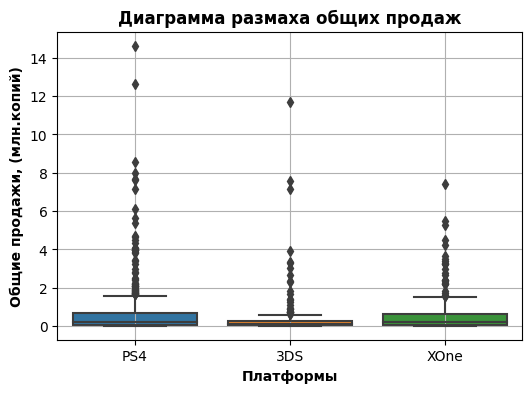

In [42]:
sns.boxplot(data=df_act.query("platform == ['PS4', 'XOne', '3DS']"), x='platform', y='all_sales')
plt.title("Диаграмма размаха общих продаж", fontweight="bold")
plt.xlabel("Платформы", fontweight="bold")
plt.ylabel("Общие продажи, (млн.копий)", fontweight="bold")
plt.grid(True)
plt.show()

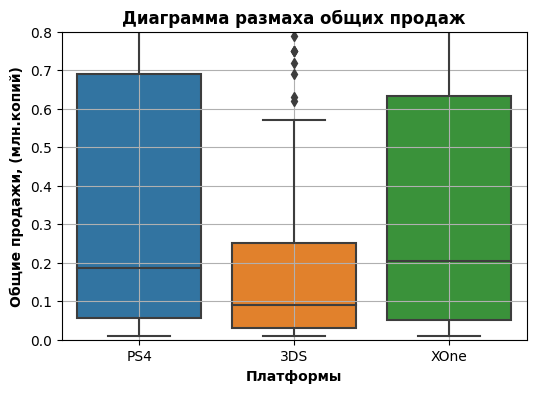

In [43]:
sns.boxplot(data=df_act.query("platform == ['PS4', 'XOne', '3DS']"), x='platform', y='all_sales')
plt.title("Диаграмма размаха общих продаж", fontweight="bold")
plt.xlabel("Платформы", fontweight="bold")
plt.ylabel("Общие продажи, (млн.копий)", fontweight="bold")
plt.grid(True)
plt.ylim(0, 0.8)
plt.show()

Посмотрим, какими играми обусловлены наиболее яркие выбросы по платформам

In [44]:
df_act.query('platform == "PS4" & all_sales > 12 or \
            platform == ["XOne", "3DS"] & all_sales > 6')\
      .sort_values(by='platform')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unk,11.680000
7,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,unk,7.550000
10,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,unk,7.140000
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unk,14.630000
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.620001
8,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unk,7.390000


In [45]:
df_act.query("platform == ['PS4', 'XOne', '3DS']")\
      .groupby('platform')['all_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39


**Вывод:** из диаграммы размаха видно, разброс значений общих продаж по наиболее популярной платформе `PS4` выше остальных и достигает боллее 14 млн копий, что почти в 80 раз превышает медианное значение. Такие продажи платформе принесла игра `Call of Duty: Black Ops 3 и Grand Theft Auto V` - действительно популярные игры по всему миру. 

Разброс значений по остальным платформ также значителен, что подверждается разницей в 3-4 раза по всем платформам между средним и медианным значениями. Медианные значения продаж и значения 3 квартиля у `PS4` и `XOne` схожи. У обоих в арсенале имеются игры - хиты, обеспечивающие популярность и потенциальную прибыльность этих платформ. 

По платформе `3DS` дела с общими продажами, медианным, значением 3 квартиля обстоят похуже, чем у конкурентов, платформа выпущена в 2013 году и на 2 года старше их, но мы видим, что максимальные продажи ей принесла игра "Pokemon" и ее последняя версия `Pokemon Sun/Moon` выпущена в 2016 году, позже остальных популярных игор конкурентов, приносящих им максимальный доход, поэтому, как и решили ранее, оставим эту платформу для дальнейшего рассмотрения.

Все вышеперечисленные платформы имеют игры, пользующиеся большой популярностью у игроков и поэтому являются потенциально прибыльными. Исключать редкие значения общих продаж не будем, все же они обусловлены объективно успешными играми.

### Рассмотрение влияния на продажи отзывов пользователей и критиков на популярных платформах

Построим диаграммы рассеяния на основе отзывов и общих продаж по выбранным популярным платформам и рассчитаем необходимые коэффициенты корреляции

**Платформа `PS4`**

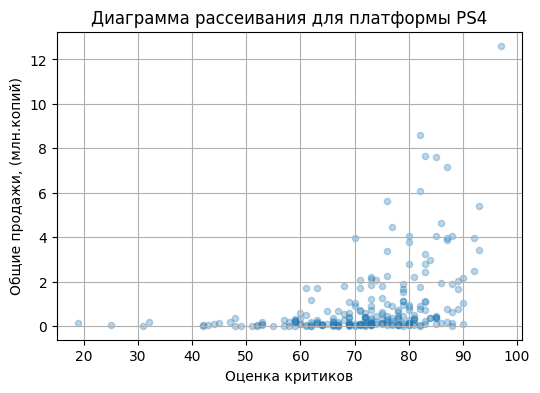

In [46]:
df_act.query('platform == "PS4"')\
      .plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.3, figsize=(6, 4),\
            sharex=False, grid=True)
plt.title("Диаграмма рассеивания для платформы PS4")
plt.xlabel("Оценка критиков")
plt.ylabel("Общие продажи, (млн.копий)")
plt.show()

In [47]:
print('Коэффициент корреляции между оценками критиков и общими продажами по PS4:',\
      round(df_act.loc[df_act['platform'] == 'PS4', 'critic_score']\
            .corr(df_act.loc[df_act['platform'] == 'PS4', 'all_sales']), 2))

Коэффициент корреляции между оценками критиков и общими продажами по PS4: 0.4


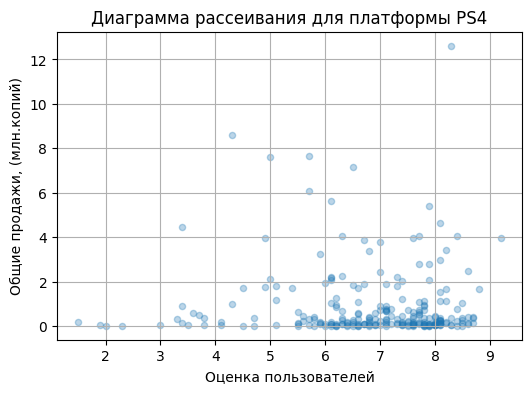

In [48]:
df_act.query('platform == "PS4"')\
      .plot(x='user_score', y='all_sales', kind='scatter', alpha=0.3, figsize=(6, 4),\
            sharex=False, grid=True)
plt.title("Диаграмма рассеивания для платформы PS4")
plt.xlabel("Оценка пользователей")
plt.ylabel("Общие продажи, (млн.копий)")
plt.show()

In [49]:
print('Коэффициент корреляции между оценками пользователей и общими продажами по PS4:',\
      round(df_act.loc[df_act['platform'] == 'PS4', 'user_score']\
            .corr(df_act.loc[df_act['platform'] == 'PS4', 'all_sales']), 2))

Коэффициент корреляции между оценками пользователей и общими продажами по PS4: -0.04


**Платформа `XOne`**

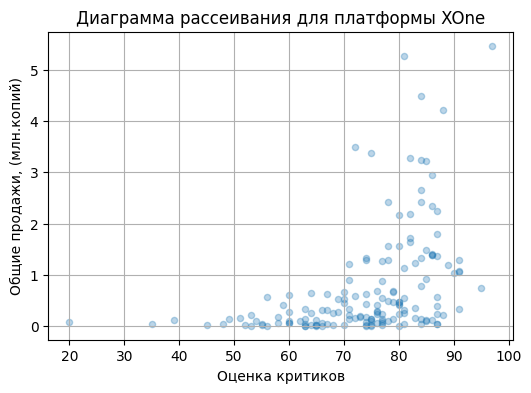

In [50]:
df_act.query('platform == "XOne"')\
      .plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.3, figsize=(6, 4),\
            sharex=False, grid=True)
plt.title("Диаграмма рассеивания для платформы XOne")
plt.xlabel("Оценка критиков")
plt.ylabel("Общие продажи, (млн.копий)")
plt.show()

In [51]:
print('Коэффициент корреляции между оценками критиков и общими продажами по XOne:',\
      round(df_act.loc[df_act['platform'] == 'XOne', 'critic_score']\
            .corr(df_act.loc[df_act['platform'] == 'XOne', 'all_sales']), 2))

Коэффициент корреляции между оценками критиков и общими продажами по XOne: 0.43


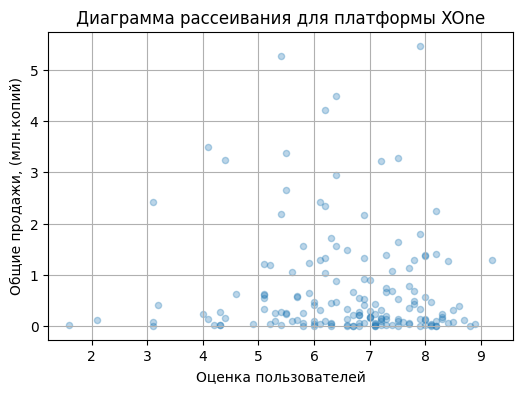

In [52]:
df_act.query('platform == "XOne"')\
      .plot(x='user_score', y='all_sales', kind='scatter', alpha=0.3, figsize=(6, 4),\
            sharex=False, grid=True)
plt.title("Диаграмма рассеивания для платформы XOne")
plt.xlabel("Оценка пользователей")
plt.ylabel("Общие продажи, (млн.копий)")
plt.show()

In [53]:
print('Коэффициент корреляции между оценками пользователей и общими продажами по XOne:',\
      round(df_act.loc[df_act['platform'] == 'XOne', 'user_score']\
            .corr(df_act.loc[df_act['platform'] == 'XOne', 'all_sales']), 2))

Коэффициент корреляции между оценками пользователей и общими продажами по XOne: -0.07


**Платформа `3DS`**

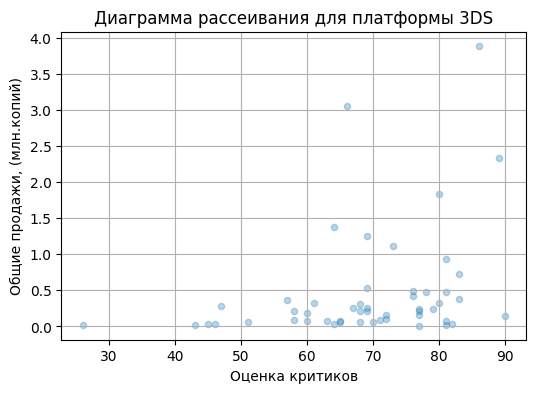

In [54]:
df_act.query('platform == "3DS"')\
      .plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.3, figsize=(6, 4),\
            sharex=False, grid=True)
plt.title("Диаграмма рассеивания для платформы 3DS")
plt.xlabel("Оценка критиков")
plt.ylabel("Общие продажи, (млн.копий)")
plt.show()

In [55]:
print('Коэффициент корреляции между оценками критиков и общими продажами по 3DS:',\
      round(df_act.loc[df_act['platform'] == '3DS', 'critic_score']\
            .corr(df_act.loc[df_act['platform'] == '3DS', 'all_sales']), 2))

Коэффициент корреляции между оценками критиков и общими продажами по 3DS: 0.31


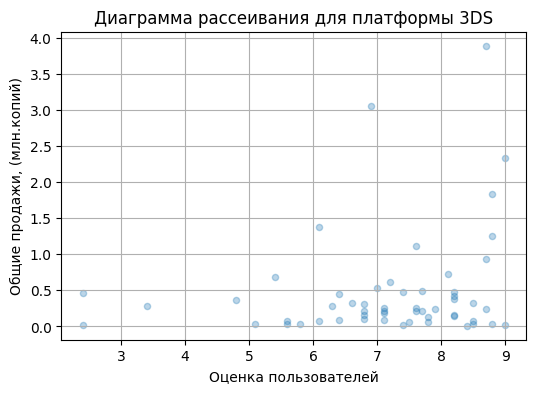

In [56]:
df_act.query('platform == "3DS"')\
      .plot(x='user_score', y='all_sales', kind='scatter', alpha=0.3, figsize=(6, 4),\
            sharex=False, grid=True)
plt.title("Диаграмма рассеивания для платформы 3DS")
plt.xlabel("Оценка пользователей")
plt.ylabel("Общие продажи, (млн.копий)")
plt.show()

In [57]:
print('Коэффициент корреляции между оценками пользователей и общими продажами по 3DS:',\
      round(df_act.loc[df_act['platform'] == '3DS', 'user_score']\
            .corr(df_act.loc[df_act['platform'] == '3DS', 'all_sales']), 2))

Коэффициент корреляции между оценками пользователей и общими продажами по 3DS: 0.22


**Вывод:** по результатам анализа влияния на продажи отзывов пользователей и критиков на популярных платформах получили следующие результаты:

коэффициент корреляции между оценками критиков и общими продажами составил: по `PS4: 0.4, XOne: 0.43, 3DS: 0.31`, что соответствует прямой средне - слабой корреляции между параметрами

коэффициент корреляции между оценками пользователей и общими продажами составил: по `PS4: -0.04, XOne: -0.07, 3DS: 0.22`, что соответствует практически отсутствующей для `PS4 и XOne` и очень слабой для `3DS` корреляции между параметрами

Таким образом, оценки критиков демонстрируют прямую, средне-слабую корреляцию со значениями продаж. Оценки пользователей корреляции с продажами практически не имеют.

## Анализ продаж игр на других платформах

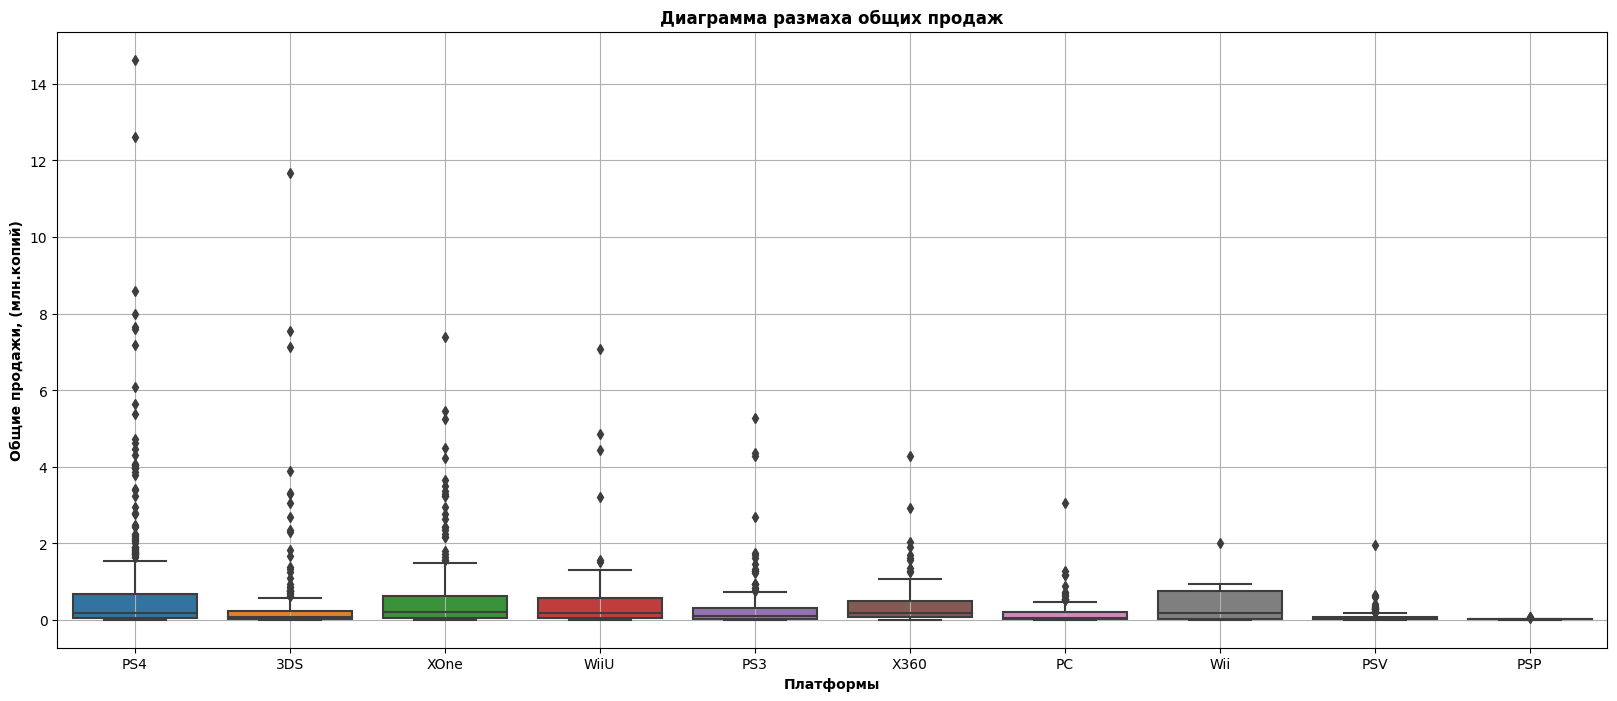

In [58]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df_act, x='platform', y='all_sales')
plt.title("Диаграмма размаха общих продаж", fontweight="bold")
plt.xlabel("Платформы", fontweight="bold")
plt.ylabel("Общие продажи, (млн.копий)", fontweight="bold")
plt.grid(True)
plt.show()

Нам необходимо сравнить более подробно, отсечем редкие значения

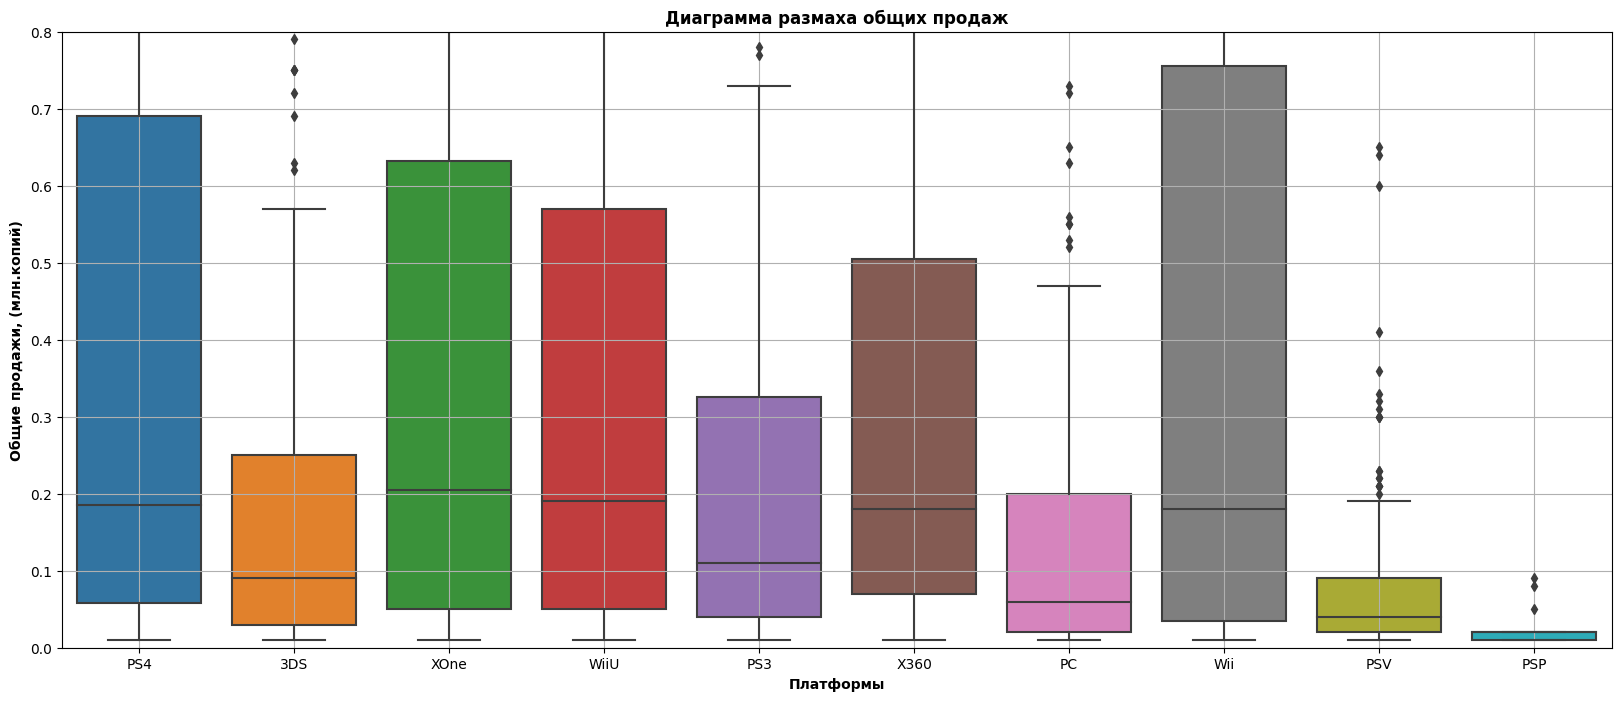

In [75]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df_act, x='platform', y='all_sales')
plt.title("Диаграмма размаха общих продаж", fontweight="bold")
plt.xlabel("Платформы", fontweight="bold")
plt.ylabel("Общие продажи, (млн.копий)", fontweight="bold")
plt.grid(True)
plt.ylim(0, 0.8)
plt.show()

In [60]:
df_act.groupby('platform')['all_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


In [61]:
df_act.groupby(['platform'])[['all_sales']]\
      .sum()\
      .sort_values(by='all_sales', ascending=False)\
      .reset_index()

,platform,all_sales
0,PS4,288.149994
1,XOne,140.360001
2,3DS,86.680000
3,PS3,68.180000
4,X360,48.220001
5,WiiU,42.980000
6,PC,27.050001
7,PSV,22.400000
8,Wii,5.070000
9,PSP,0.360000


**Вывод:** из диаграммы размаха видно, разброс значений общих продаж самый высокий у рассматриваемых лидеров `PS4, XOne, 3DS` + `WiiU` и `PS3`, которая находится на четвертом место по общим продажам за рассматриваемый период.

"Крепкие" средние продажи игр (с высоким 3 квартилем) наблюдаются у лидеров `PS4 и XOne` + `WiiU, Wii` на базе Nintendo (при этом у `Wii` наблюдается значительное снижение продаж, как у более старой версии) и `X360`, у всех этих пяти консолей очень схожи  медианные значения, за счет чего эти платформы, в том числе, обеспечивали себе объемы продаж. Однако, как показывают данные, лидерами по общим продажам становятся те платформы, которые смогли выпустить хиты и за счет них обеспечили себе высокие продажи.

## Общее распределение игр по жанрам

Рассчитаем распределение общих продаж по жанрам и отобразим в графическом и табличном виде

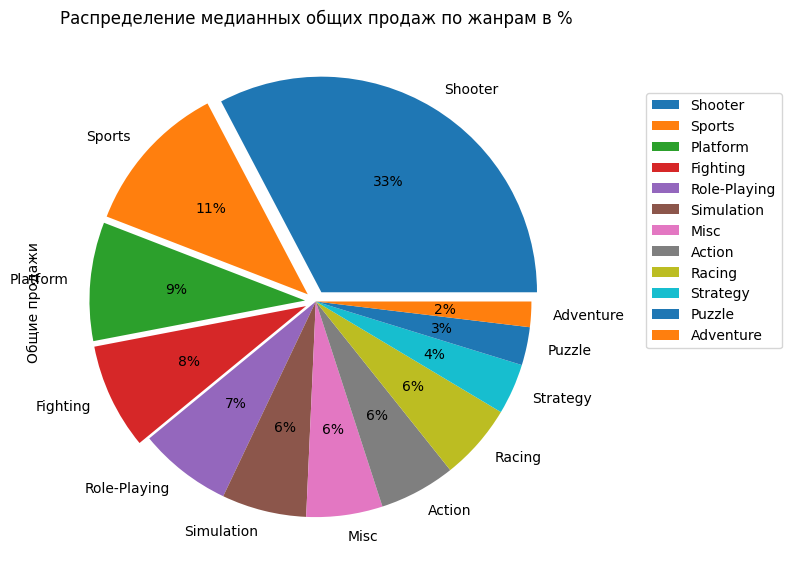

In [62]:
explode = (0.05, 0.05, 0.05, 0.05, 0, 0, 0, 0, 0, 0, 0, 0)
df_act.pivot_table(index='genre', values='all_sales', aggfunc='median')\
            .sort_values(by='all_sales', ascending=False)\
            .plot.pie(y='all_sales', autopct='%1.0f%%', figsize=(7, 7), explode=explode)
plt.title("Распределение медианных общих продаж по жанрам в %")
plt.ylabel("Общие продажи")
plt.legend(bbox_to_anchor=(1.1, 0.9))
plt.show()

In [63]:
df_act.pivot_table(index='genre', values='all_sales', aggfunc='median')\
            .sort_values(by='all_sales', ascending=False)

,all_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Misc,0.090
Action,0.090
Racing,0.090


**Вывод:** анализ данных показал, что самым прибыльным жанром, приносящим стабильно высокий доход, является жанр `Shooter`, на который приходится треть от средних продаж, далее по убывающей следует `Sports, Platform, Fighting`.
К крайне низким по прибыльности жанрам можно отнести `Strategy`, `Puzzle` и `Adventure`

## Составление "портрета" пользователя каждого региона

### Самые популярные платформы (топ-5) по регионам

Рассчитаем распределение общих продаж по платформам для каждого из рассматриваемых регионов и отобразим в графическом виде раздельно и в сводной таблице

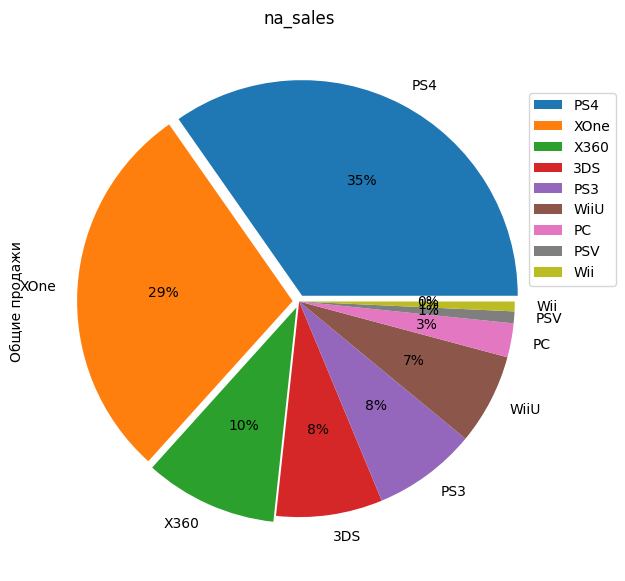

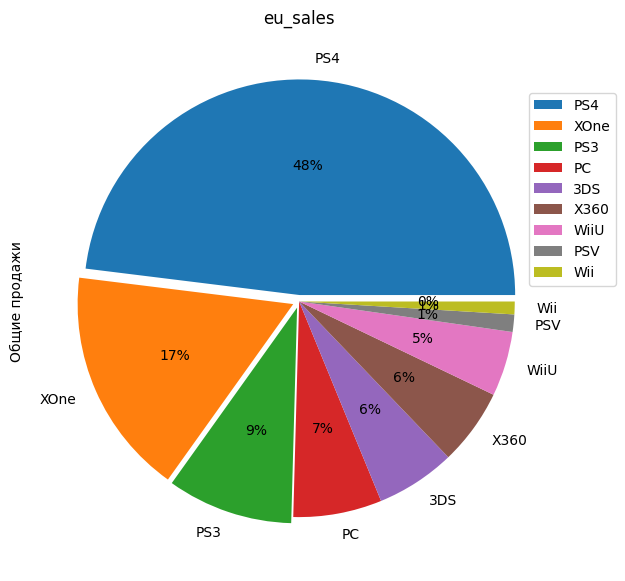

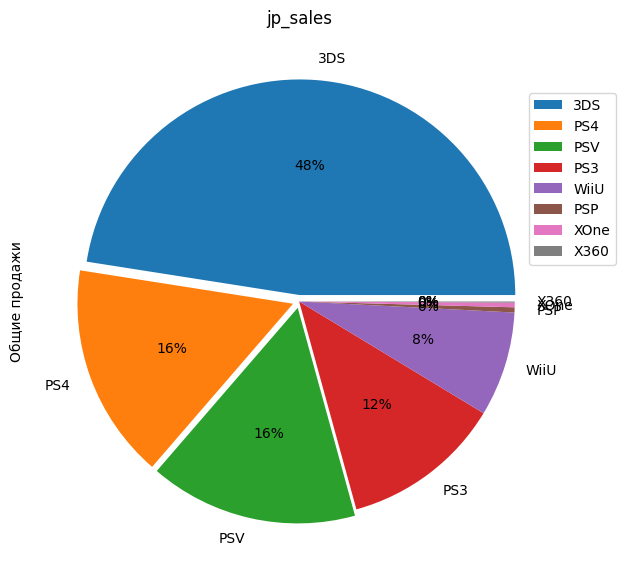

,eu_sales,jp_sales,na_sales
platform,,,
PS4,130.039993,15.020000,98.610001
XOne,46.250000,0.320000,81.269997
X360,15.490000,0.080000,28.299999
3DS,16.120001,44.240002,22.639999
PS3,25.539999,11.220000,22.049999
WiiU,13.150000,7.310000,19.360001
PC,17.969999,0.000000,7.230000
PSV,3.530000,14.540000,2.520000
Wii,2.590000,0.000000,2.080000


In [64]:
region_sales = ['na_sales', 'eu_sales', 'jp_sales']

for i in region_sales:
    explode = (0.03, 0.03, 0.03, 0, 0, 0, 0, 0, 0, 0)
    df_act.pivot_table(index='platform', values=i, aggfunc='sum')\
            .sort_values(by=i, ascending=False)\
            .plot.pie(y=i, autopct='%1.0f%%', figsize=(7, 7), title=i, explode=explode)
    plt.ylabel("Общие продажи")
    plt.legend(bbox_to_anchor=(1.1, 0.9))
    plt.show()
else:
    display(df_act.pivot_table(index='platform', values=region_sales, aggfunc='sum')\
    .sort_values(by='na_sales', ascending=False))

**Вывод:** из анализа продаж, видно, что наиболее популярными платформами в Северной Америке и Европе являются `PS4 и XOne`, которые занимают на двоих объем рынка по продажам в 63% и 65% соответственно, причем, если в Северной Америке распределение объема продаж между ними схожи, то в Европе почти половину рынка занимает консоль `XOne`. Следующие за ними 4-5 платформ имеют примерно схожие объемы продаж и не могут составить конкуренцию лидерам.

Рынок Японии имеет существенные отличия, где примерно половина от общего объема продаж приходится на платформу `3DS`, а на консоли `PS4, PS3, PSV, Wii` приходится оставшаяся половина рынка, в том числе на долю лидера Северной Америки и Европы платформы `PS4` приходится только 16%, а платформа `XOne` вообще является аутсайдером.

Это объясняется отличием культур и играми, которые исторически были популярными в регионах, так мы видим, что в Японии наибольшим спросом пользуются серии `Super Smash Bros.` от японского дизайнера Масахиро Сакурай, а также серия игр `Pokemon или Pocket Monsters`, издаваемая Nintendo c 1996 года

### Самые популярные жанры (топ-5) по регионам

Рассчитаем распределение общих продаж по жанрам для каждого из рассматриваемых регионов и отобразим в графическом виде раздельно и в сводной таблице

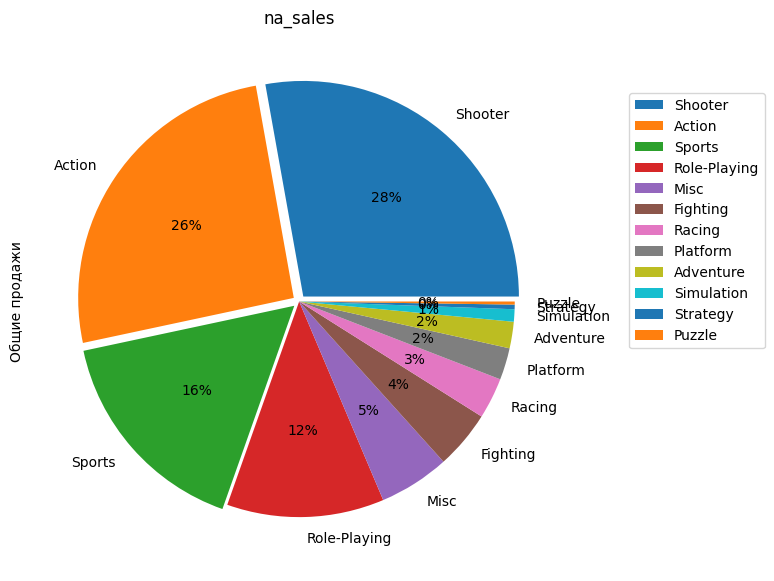

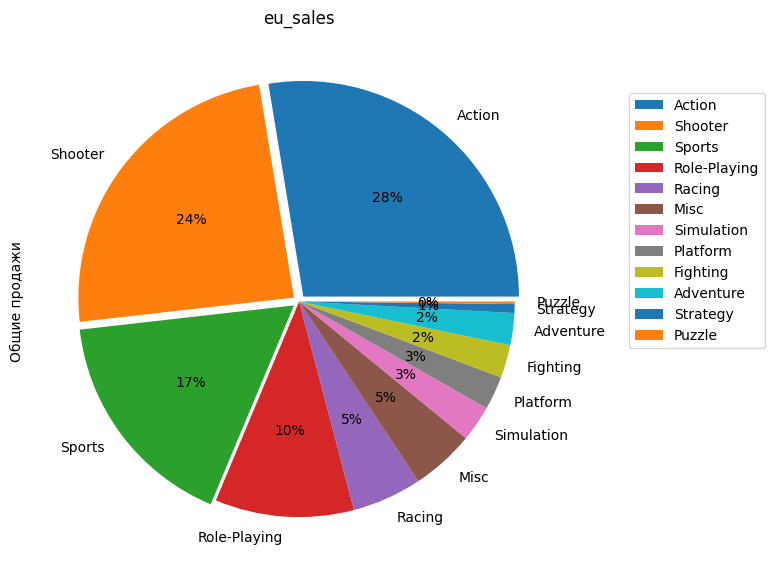

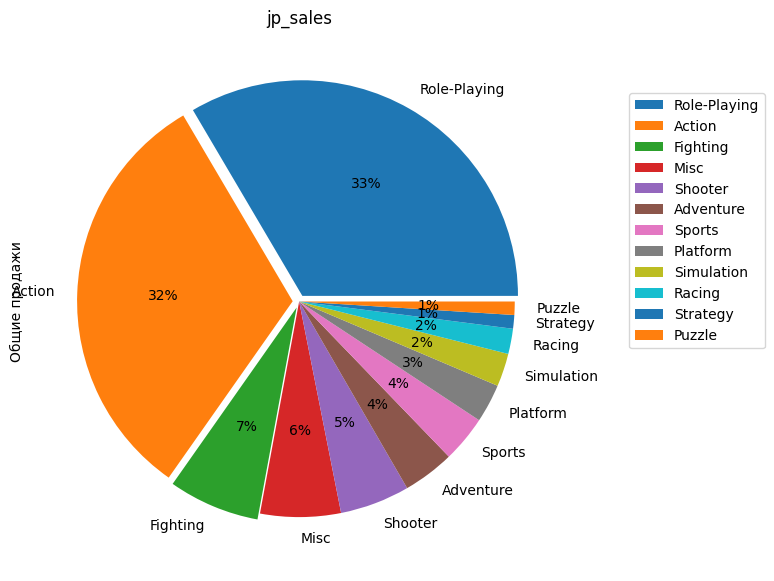

,eu_sales,jp_sales,na_sales
genre,,,
Shooter,65.519997,4.87,79.019997
Action,74.680000,29.58,72.529999
Sports,45.730000,3.26,46.130001
Role-Playing,28.170000,31.16,33.470001
Misc,12.860000,5.61,15.050000
Fighting,6.690000,6.37,12.430000
Racing,14.130000,1.76,8.740000
Platform,6.800000,2.69,6.790000
Adventure,6.490000,3.60,5.640000


In [65]:
region_sales = ['na_sales', 'eu_sales', 'jp_sales']

for i in region_sales:
    explode = (0.03, 0.03, 0.03, 0, 0, 0, 0, 0, 0, 0, 0, 0)
    df_act.pivot_table(index='genre', values=i, aggfunc='sum')\
            .sort_values(by=i, ascending=False)\
            .plot.pie(y=i, autopct='%1.0f%%', figsize=(7, 7), title=i, explode=explode)
    plt.ylabel("Общие продажи")
    plt.legend(bbox_to_anchor=(1.1, 0.9))
    plt.show()
else:
    display(df_act.pivot_table(index='genre', values=region_sales, aggfunc='sum')\
    .sort_values(by='na_sales', ascending=False))

**Вывод:** анализ продаж по жанрам в регионах показывает картину, соответствующую популярности вышеописанных платформ и играм-хитам, которые выходят на этих платформах, так в Северной Америке и Европе, распределения продаж очень схожи, топ-3 жанрами являются `Shooter, Action, Sports`, где первые два жанра занимают более половины от общего объема продаж и соответствующие этим жанрам явлются крайне популярные игры, такие как: `Call of Duty: Black Ops 3` в жанре `Shooter`, `Grand Theft Auto V` в жанре `Action`, `FIFA, NBA` в жанре `Sports`.

Соответственно на рынке Японии особо выделяются два жанра `Role-Playing` и `Action`, которые составляют на двоих 65,3% от общего объема продаж, что соответствует таким популярным играм, как `Pokemon` в жанре `Role-Playing` и `Monster Hunter X, серии Yokai Watch` в жанре `Action`.

### Оценка влияния рейтинга ESRB на продажи в отдельном регионе

Рассчитаем распределение общих продаж по рейтингу ESRB для каждого из рассматриваемых регионов и отобразим в графическом виде раздельно и в сводной таблице

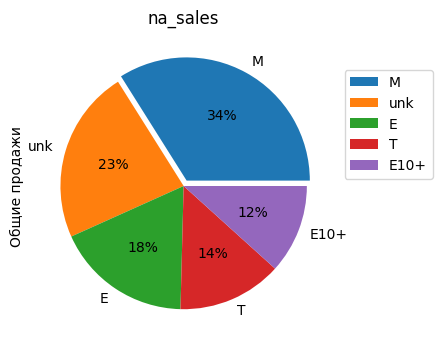

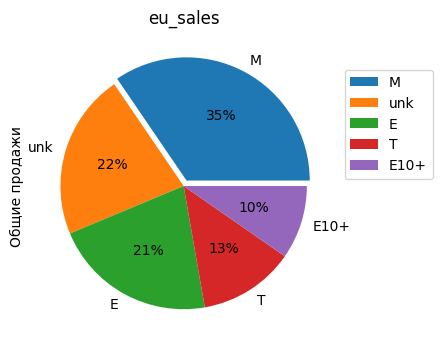

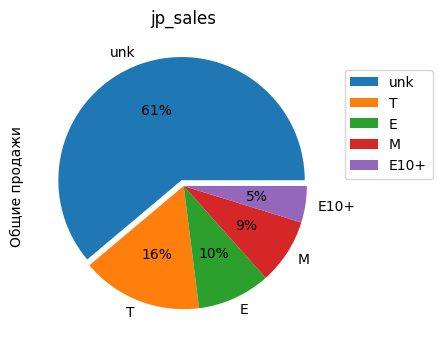

,eu_sales,jp_sales,na_sales
rating,,,
M,93.440002,8.010000,96.419998
unk,58.950001,56.900002,64.720001
E,58.060001,8.940000,50.740002
T,34.070000,14.780000,38.950001
E10+,26.160000,4.460000,33.230000


In [66]:
region_sales = ['na_sales', 'eu_sales', 'jp_sales']

for i in region_sales:
    explode = (0.05, 0, 0, 0, 0)
    df_act.pivot_table(index='rating', values=i, aggfunc='sum')\
            .sort_values(by=i, ascending=False)\
            .plot.pie(y=i, autopct='%1.0f%%', figsize=(4, 4), title=i, explode=explode)
    plt.ylabel("Общие продажи")
    plt.legend(bbox_to_anchor=(1, 0.9))
    plt.show()
else:
    display(df_act.pivot_table(index='rating', values=region_sales, aggfunc='sum')\
    .sort_values(by='na_sales', ascending=False))

**Вывод:** при анализе рейтинга ESRB (американская рейтинговая модель) нужно скорее говорить не о влиянии его на продажи, а на отражении им популярных игр, которым он присвоен и их продаж. Так, если отбросить тип `unk`, т.е игры с неизвестным или не присвоенным рейтингом ESRB, так в Японии, например, действует своя рейтинговая система `CERO`, а Европе `PEGI`, то мы видим, что наибольшим продажам в Северной Америке и Европе соответствуют игры с рейтингом `M` (для взрослых) - это различные шутеры и, конечно, `Grand Theft Auto V` и с рейтингом `E` (для всех), это, например, популярные игры категории `Sports`. 

В Японии наибольший объем продаж - 61,1% приходится как раз на популярные у них игры без рейтинга ESRB, такие как `Yokai Watch, Pokemon, Super Smash Bros.`, а следующими по распространению идут рейтинги `T` (подростки), например, серии игр `Monster Hunter` и `E` - `Super Mario`.

## Проверка гипотез

### Проверка гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC

Сформулируем двустороннюю гипотезу:
- нулевая гипотеза: средние значения пользовательских рейтингов платформ Xbox One и PC равны
- альтернативная гипотеза: средние значения пользовательских рейтингов платформ Xbox One и PC различаются

В связи с тем, что выборки независимые, используем **двухвыборочный t-тест для независимых выборок**

Учитывая, что t-тест устойчив к разнице дисперсий совокупностей в несколько раз, а выборки не велики и по объединенной выборке стандартное отклонение выборочного распределения статистики будет оценено по ней точнее, оставим дополнительный параметр по умолчанию, что дисперсии равны.

In [67]:
df_act_xone_user = df_act.loc[df_act['platform'] == 'XOne', 'user_score'].dropna()
len(df_act_xone_user)

165

In [68]:
df_act_pc_user = df_act.loc[df_act['platform'] == 'PC', 'user_score'].dropna()
len(df_act_pc_user)

122

In [69]:
# зададим уровень значимости
alpha = .05

# проводим ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу
results = st.ttest_ind(df_act_xone_user, df_act_pc_user)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, средние значения пользовательских рейтингов платформ Xbox One и PC не равны')
else:
    print('Не отвергаем нулевую гипотезу, что средние значения пользовательских рейтингов платформ Xbox One и PC равны')
    
# Дополнительно отобразим медианы этих выборок
print()
print('Медиана пользовательских рейтингов платформы Xbox One:',\
      round(df_act_xone_user.median(), 2))
print('Медиана пользовательских рейтингов платформы PC:',\
      round(df_act_pc_user.median(), 2))

p-value: 0.10450648833224654
Не отвергаем нулевую гипотезу, что средние значения пользовательских рейтингов платформ Xbox One и PC равны

Медиана пользовательских рейтингов платформы Xbox One: 6.8
Медиана пользовательских рейтингов платформы PC: 6.8


**Вывод:** проверяемую гипотезу не отвергаем, нет оснований говорить, что средние значения пользовательских рейтингов платформ Xbox One и PC не равны

### Проверка гипотезы о неравенстве средних пользовательских рейтингов жанров Action  и Sports 

Сформулируем двустороннюю гипотезу:
- нулевая гипотеза: средние значения пользовательских рейтингов жанров Action и Sports равны
- альтернативная гипотеза: средние значения пользовательских рейтингов жанров Action и Sports различаются

В связи с тем, что выборки независимые, используем **двухвыборочный t-тест для независимых выборок**

Учитывая, что t-тест устойчив к разнице дисперсий совокупностей в несколько раз, а выборки не велики и по объединенной выборке стандартное отклонение выборочного распределения статистики будет оценено по ней точнее, оставим дополнительный параметр по умолчанию, что дисперсии равны.

In [70]:
df_act_action_user = df_act.loc[df_act['genre'] == 'Action', 'user_score'].dropna()
len(df_act_action_user)

297

In [71]:
df_act_sports_user = df_act.loc[df_act['genre'] == 'Sports', 'user_score'].dropna()
len(df_act_sports_user)

127

In [72]:
# зададим уровень значимости
alpha = .05

# проводим ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу
results = st.ttest_ind(df_act_action_user, df_act_sports_user)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, средние значения пользовательских рейтингов жанров Action и Sports не равны')
else:
    print('Не отвергаем нулевую гипотезу, что средние значения пользовательских рейтингов жанров Action и Sports равны')
    
# Дополнительно отобразим медианы этих выборок
print()
print('Медиана пользовательских рейтингов жанра Action:',\
      round(df_act_action_user.median(), 2))
print('Медиана пользовательских рейтингов жанроа Sports:',\
      round(df_act_sports_user.median(), 2))

p-value: 2.871146400695882e-19
Отвергаем нулевую гипотезу, средние значения пользовательских рейтингов жанров Action и Sports не равны

Медиана пользовательских рейтингов жанра Action: 7.1
Медиана пользовательских рейтингов жанроа Sports: 5.5


**Вывод:** Нулевая гипотеза отвергнута в пользу проверяемой, средние значения пользовательских рейтингов жанров Action и Sports значимо различаются

## Общий вывод

**В рамках проекта  была проведена:** предобработка данных, исследовательский анализ данных с необходимой визуализацией и определением актуального периода для прогноза кампании на 2017 год, анализ продаж на потенциально прибыльных и остальных платформах, рассмотрение влияния на продажи отзывов пользователей и критиков, составление "портрета" пользователя каждого региона, проверка требуемых гипотез. 

**На этапе предобработки данных:** проведена проверка на дубликаты и обработаны пропуски, произведены необходимые замены в столбце `user_score` некорректных для его типа значений (`tbd`), в столбце `rating` устаревшего рейтинга `"K-A"`, а также обработаны пропуски в нем. По оставшимся пропущенным параметрам в `critic_score`,  `user_score` в связи с отсутствием логичной замены и для сохранения данных для дальнейшего анализа были сохранены пропуски. Произведено необходимое изменение типов данных.

**На этапе исследовательского анализа данных:** более глубоко исследованы  данные, предложенные к анализу, в том числе с использованием графических инструментов. Визуализация данных проводилась в соответствии с их типом (дискретные, непрерывные). Построены распределения выпуска игр по годам и  общих продаж по платформам. 

Из анализа данных определено, что новые платформы или новые версии старых платформ появляются каждые 1-2 года, а из графиков распределения продаж по годам 6 крупнейших платформ выявлено, что средний цикл жизни игровой платформы составляет 10 лет, что обусловлено развитием технологий, повышением требований игр к "железу" и соответственно необходимости в условиях конкуренции постоянной модернизации платформ, выпуском их новых версий и завершением разработчиками поддержки старых платформ. 

На основании анализа данных был выбран актуальный трехлетний период с 2014 по 2016 год для прогноза кампании на 2017 год. В рамках этого периода определены 3 потенциально прибыльные платформы, для которых был проведен анализ с использованием диаграмм размаха по общим продажам игр. Все отобранные платформы имеют в своем арсенале игры - хиты, которые, в том числе, обеспечивают им популярность у фанатов и поддерживают продажи на высоком уровне.

Рассмотрено влияние на продажи отзывов пользователей и критиков на отобранных платформах, получены следующие результаты:
- коэффициент корреляции между оценками критиков и общими продажами составил: по PS4: 0.4, XOne: 0.43, 3DS: 0.31, что соответствует прямой средне - слабой корреляции между параметрами
- коэффициент корреляции между оценками пользователей и общими продажами составил: по PS4: -0.04, XOne: -0.07, 3DS: 0.22, что соответствует практически отсутствующей для PS4 и XOne и очень слабой для 3DS корреляции между параметрами  

Таким образом, оценки критиков демонстрируют прямую, средне-слабую корреляцию со значениями продаж. Оценки пользователей корреляции с продажами практически не имеют.

Анализ общего распределения игр по жанрам показал, что самым прибыльным жанром, приносящим стабильно высокий доход, является жанр `Shooter`, на который приходится треть от средних продаж, далее по убывающей следует `Sports, Platform, Fighting`. К крайне низким по прибыльности жанрам можно отнести `Strategy`, `Puzzle` и `Adventure`

**На этапе составления "портрета" пользователя каждого региона:** проанализированы самые популярные платформы и жанры по предложенным регионам: "Северная Америка", "Европа", "Япония", а также рассмотрели влияние рейтинга ESRB на продажи в каждом регионе.
- наиболее популярными платформами в Северной Америке и Европе являются `PS4 и XOne`, которые занимают на двоих объем рынка по продажам в 63% и 65% соответственно, в Европе консоль `XOne` занимает почти половину рынка. На рынке Японии половина от общего объема продаж приходится на платформу `3DS`, а на долю лидера Северной Америки и Европы платформы `PS4` приходится только 16%, а платформа `XOne` вообще является аутсайдером.
- анализ продаж по жанрам в регионах показывает картину, соответствующую популярности вышеописанных платформ и играм-хитам, которые выходят на этих платформах, так в Северной Америке и Европе, распределения продаж очень схожи, топ-3 жанрами являются `Shooter, Action, Sports`, где первые два жанра занимают более половины от общего объема продаж. На рынке Японии особо выделяются два жанра `Role-Playing` и `Action`, которые составляют на двоих 65,3% от общего объема продаж.
- анализ рейтинга `ESRB` показал, что если отбросить тип `unk`, т.е игры с неизвестным или не присвоенным рейтингом ESRB, так как в Японии, например, действует своя рейтинговая система `CERO`, а Европе `PEGI`, то мы видим, что наибольшим продажам в Северной Америке и Европе соответствуют игры с рейтингом `M` (для взрослых) и с рейтингом `E` (для всех). В Японии наибольший объем продаж - 61,1% приходится как раз на популярные у них игры, которым не присваивался рейтинг ESRB, местные хиты, а следующими по распространению идут рейтинги `T` (подростки) и `E`.

**На этапе проверки гипотез:** сформулированы необходимые нулевые и альтернативные гипотезы, проведены требуемые расчеты и сделаны следующие выводы:
- есть основания говорить, что средние значения пользовательских рейтингов платформ Xbox One и PC равны
- есть основания говорить, что средние значения пользовательских рейтингов жанров Action и Sports значимо различаются
_______

**На основании вышеизложенных результатов сформированы следующие рекомендации для планирования продаж на 2017 год:**
  1. В связи с динамичностью развития компьютерных технологий и высокой конкуренцией в этой сфере, имеет смысл ориентироваться на статистику продаж не старше 3-х лет. 
  2. В качестве потенциально прибыльных платформ для планирования продаж и для рекламных целей выбрать: `PS4, XOne и 3DS`
  3. Учитывать, например, при прочих равных показателях, что оценки критиков имеют прямую, средне-слабую корреляцию со значениями продаж игр, а оценки пользователей корреляции с продажами практически не имеют.
  3. Ориентироваться на самый прибыльный жанр, который приносит стабильно высокий доход среди всех остальных, жанр `Shooter`. 
  4. При планирования продаж по регионам и для рекламных целей выбрать следующие платформы и жанры, с учетом рейтинга `ESRB` (в порядке убывания приоритета):  
    
    регион `Северная Америка`:
    - платформы: PS4 и XOne
    - жанры: Shooter, Action, Sports
    - по рейтингу ESRB: `M` (для взрослых), `E` (для всех), `T` (подростки)
    
    регион `Европа`:
    - платформы: PS4 и XOne (с упором на PS4)
    - жанры: Action, Shooter, Sports
    - по рейтингу ESRB: `M` (для взрослых), `E` (для всех), `T` (подростки)
    
    регион `Япония`:
    - платформы: 3DS и PS4 (с упором на 3DS)
    - жанры: Role-Playing, Action
    - по рейтингу ESRB: не является показательным
    